***
<left>
    <img style="float: left;" src="module2_heading.jpeg" width="800"></img>
</left>

<br/><br/>
<br/><br/>

## Supervised learning

In this section you will learn about the basic idea of supervised learning. 

Supervised learning concerns the task of predicting some target **value** or **label** given some input **data**. With mathematical notation we want to *estimate* a *model*, which is typically a function such that for the data $x$ and label $y$

$$f(x) = y$$

$x$ and $y$ can be either discrete or continuous. In the case of a discrete target variable $y$ one often describes this as a *classification* problem and in the case of a continuous target variable $y$ we call this a *regression* problem.

The reason we call such a problem a *supervised learning problem* is that we have provided labeled data, i.e. we are giving the correct answer, and the learning algorithm's goal is to find the relation between the data and the true label by producing an *estimator* denoted by $\hat{f}(x)=\hat{y}$ of the model for $f(x)=y$. 
Then when we get unlabelled data of the form $(x^{\prime},?)$ in the future, i.e., we do not know the label associated with a new data point $x^{\prime}$, the estimator $\hat{f}$ produced by the learning algorithm can be used to *predict* the unknown label as $\hat{y}=\hat{f}(x^{\prime})$.

In general, the learning process goes as follows:

1. we select a subset of the data and fit the model on this part of the data, 
2. then we test the trained model, i.e., the estimator, on the remaining part to see how well it performs. 

How we select these two parts of the data, usually called **training** and **testing** data, depends on the problem. 
If there is no time-dependence involved in the data, then we usually just do a random split into two parts. 
If time-dependence is involved then we have to take care *not* to train on the future data values and test on the past, assuming we are interested in predicting the future.

### Examples of supervised learning

* Predict the subject of a snippet of text.
* Translate between French and English
* Predict if a customer is about to churn
* Mail spam classification
* Image classification

### Regression, Cost functions and so on

Here we go through the example of *linear regression*. With linear regression as a prototypical example we will also learn about *cost functions* and find our estimator using the *gradient descent algorithm*.

#### Linear regression

In this example we will be using a classic dataset, cars. Loading the dataset we get the following:

In [1]:
import pandas as pd
cars = pd.read_csv('../../Data/cars.csv')
cars.head(2)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0


There are many things we can do here but one thing is checking the fuel consumption as a function of engine size. In the US one uses MPG which is `Miles Per Gallon` which is 1/GPM, where GPM is `Gallons Per Mile`, this is the rate at which the fuel is consumed, not how far you can travel on a gallon.
Therefore we begin by doing the feature transformation from MPG to GPM.

In [2]:
cars['GPM'] = 1/cars['MPG']
cars = cars.dropna()

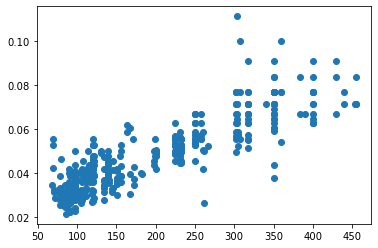

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(cars['Displacement'],cars['GPM'])
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg = LinearRegression()
X = cars[['Displacement']]
y = cars['GPM']
lin_reg.fit(X,y)

LinearRegression()

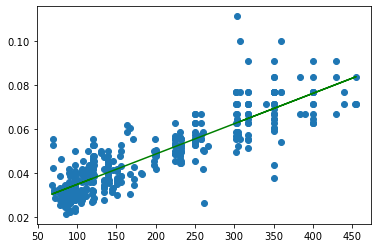

In [38]:
plt.scatter(X['Displacement'],y)
plt.plot(X['Displacement'],lin_reg.predict(X),color='Green')
plt.show()

The residual is the `error`, i.e. the difference between the fitted line and the data. We can plot how it looks here:

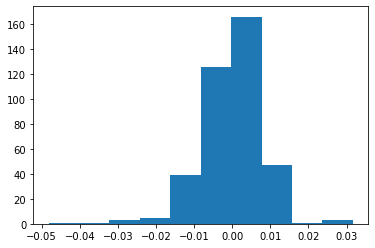

In [39]:
plt.hist(lin_reg.predict(X)-y,bins=10)
plt.show()

So what did we do? The linear regression model is the following

$$f(X) = Y = a X + b + \epsilon$$

where $\epsilon \sim N(0,\sigma)$, where $\sigma > 0$ is the variance parameter of the Normal or Gaussian random variable with mean equal to $0$.

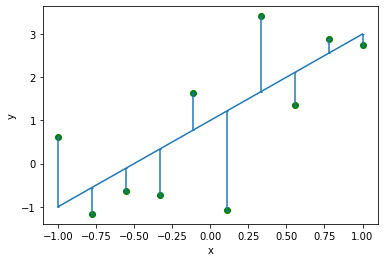

In [40]:
import numpy as np
import numpy.random as rnd
rnd.seed(1)

x = np.linspace(-1,1,10)
epsilon = rnd.normal(loc=0,scale=1,size=len(x),)
y = 2*x + 1 + epsilon

plt.errorbar(x, y-epsilon, yerr=np.abs(epsilon),uplims=(epsilon<0), lolims=(epsilon>0),capsize=1)
plt.scatter(x,y,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

So with this model in mind, how do we measure the error between a proposed line and the data? Well first of all, from the model we want to find the line which makes the residual (error) have mean zero and minimal variance. Specifically, we want to find the line that minimizes the error between the line and the data.

$$\text{argmin}_{a,b} \sum_{i=1}^N (y_i - f_{a,b}(x_i))^2$$

One way to do this is to, for each value of $a$, adjust $b$ such that the mean of the residual is zero, then go through some of these values and find the smallest error. This is simply so, since the sum of squares of the residual is minimized when the residual has mean 0.

Optimal a: 1.818182, optimal b: 0.902859


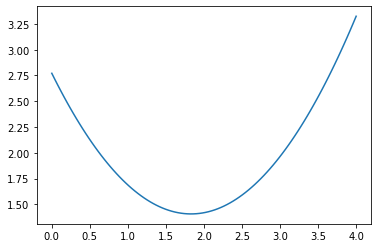

In [41]:
# These are our guesses for a
prop_a = np.linspace(0,4,100)

# Compute the residual if we use these a's, remember this is with b = 0,
# as noted above the b can be taken to be the mean of the unadjusted residual for each a

unadj_residual = y.reshape(-1,1)-prop_a.reshape(1,-1)*x.reshape(-1,1)

# Compute the variance of the unadjusted residual
variance_residual = np.std(unadj_residual,axis=0)**2

# Plot the variance for each proposed value of a
plt.plot(prop_a,variance_residual)

# Find the minimum variance
min_index = np.argmin(variance_residual)

# Set a and b based on this minimum
a = prop_a[min_index]
b = np.mean(unadj_residual[:,min_index])

print("Optimal a: %f, optimal b: %f" % (a,b))

For 10 data-points our estimated value of linear regression model parameters $a$ and $b$, i.e., $\hat{a}$ and $\hat{b}$, will not be very close to the true simulated one, this is simply because of the variation caused by the Gaussian error $\epsilon$ and the small sample size, i.e., number of training data points. In other words, for just $10$ training data points we cannot expect the estimated mean value of the error distribution to be close to the true mean. However, if the training sample size is much larger, we can get much closer to the true parameters, as depicted below with 100 data points.

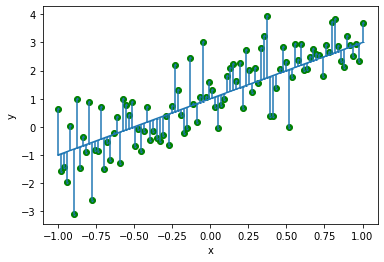

Optimal a: 2.181818, optimal b: 1.060583


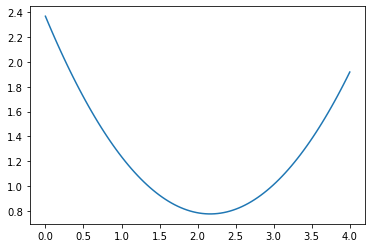

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
rnd.seed(1)

x = np.linspace(-1,1,100)
epsilon = rnd.normal(loc=0,scale=1,size=len(x),)
y = 2*x + 1 + epsilon

plt.errorbar(x, y-epsilon, yerr=np.abs(epsilon),uplims=(epsilon<0), lolims=(epsilon>0),capsize=1)
plt.scatter(x,y,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# These are our guesses for a
prop_a = np.linspace(0,4,100)

# Compute the residual if we use these a's, remember this is with b = 0,
# as noted above the b can be taken to be the mean of the unadjusted residual for each a

unadj_residual = y.reshape(-1,1)-prop_a.reshape(1,-1)*x.reshape(-1,1)

# Compute the variance of the unadjusted residual
variance_residual = np.std(unadj_residual,axis=0)**2

# Plot the variance for each proposed value of a
plt.plot(prop_a,variance_residual)

# Find the minimum variance
min_index = np.argmin(variance_residual)

# Set a and b based on this minimum
a = prop_a[min_index]
b = np.mean(unadj_residual[:,min_index])

print("Optimal a: %f, optimal b: %f" % (a,b))

#### Cost functions and gradient descent

In the above example with linear regression we wanted to minimize the vertical distance between the fitted line and the data, this vertical distance is a prime example of a **cost function**. In general when we are faced with a regression problem we want a way to measure how good our model is. This quantity that we want to *minimize* is called the cost function and its expectation (over different sample data points) is called the **risk**. The mathematical statistical justification for this approach towards minimizing expected cost or risk is called [empirical risk minimization](https://en.wikipedia.org/wiki/Empirical_risk_minimization), as we will see in the sequel in more detail.

Let us circle back to linear regression once again. The way the `np.argmin` method searched for the minimum of:

$$L(a,b) = \sum_{i=1}^N (y_i - f_{a,b}(x_i))^2$$

was by simply evaluating $L(a,b)$ for each value of $a$ in the array `prop_a` with our guessed values for $a$ and picking the $a$ that minimized $L(a,b)$. Recall we fixed $b$ in the search.

> np.argmin? # see the docstring for np.argmin and other functions/methods we are using throughout if you need to know right away.

This approach of evaluating the cost at a set of parameter values quickly becomes infeasible when the dimension of the problem is larger than $1$. 

Even if we just have two guesses for each dimension of the parameter space with $d$ dimensions, then we will need to evaluate the cost at $2^d$ parameter values. When $d=10,100,1000$, the number of evaluation points become $1024$, $1.268e30, 1.072e301$, respectively.

Often in big data settings, the number of dimensions for the regression problem can easily extend over a few thousands. 
Thus, we need a systematic way to find the optimal parameters, i.e., the parameters that minimize the cost function.

The iterative solution is called **gradient descent** and it goes like this: 

* *Initialize:* Let us start with some initial parameters, say in our linear regression example $(a,b) = (0,0)$, say at iteration $i=0$.
* *Update:* then we construct an update rule like the following to update the parameter values at $i+1$ from those at iteration $i$:

  $$a_{i+1} = a_{i}-l \frac{dL}{da}(a_{i},b_{i})$$
  
  $$b_{i+1} = b_{i}-l \frac{dL}{db}(a_{i},b_{i})$$
  
where $l > 0$ is called the learning rate.

* *Stop:* Finally we stop when a stopping rule like the following is satisfied:
$$\sqrt{ ( L(a_{i+1},b_{i+1})- L(a_{i},b_{i}))^2} < \tau,$$ 

where, $\tau$ is some tolerance threshold that says we are close enough to the minimum value found by our iteration.


Lets have a look at the landscape of the cost function with respect to both parameters $a$ and $b$ next:

/var/folders/s7/xkh8xd712s7gmjqzf010dd8c0000gr/T/ipykernel_69891/994857394.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


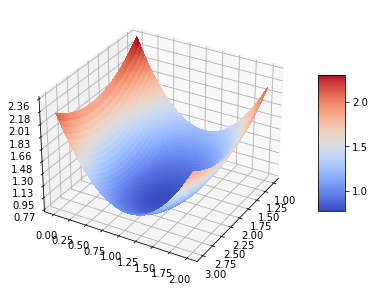

In [43]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

n_steps = 200
prop_a = np.linspace(1,3,n_steps)
prop_b = np.linspace(0,2,n_steps)

#prop_a.shape
a,b = np.meshgrid(prop_a,prop_b)

L = np.mean((y.reshape(1,1,len(x))-(a.reshape(n_steps,n_steps,1)*x.reshape(1,1,len(x)) + b.reshape(n_steps,n_steps,1)))**2,axis=2)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(a, b, L, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(np.min(L), np.max(L))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 30)
plt.show()

Let us now perform the gradient descent method, first we need a way to compute gradients of the cost function

In [44]:
def compute_gradient_at(b_ind,a_ind):
    dLda = (L[b_ind,a_ind+1]-L[b_ind,a_ind])/(prop_a[a_ind+1]-prop_a[a_ind])
    dLdb = (L[b_ind+1,a_ind]-L[b_ind,a_ind])/(prop_b[b_ind+1]-prop_b[b_ind])
    return [dLdb,dLda]

The above code just computes

$$\begin{aligned}
\frac{dL(i,j)}{da} = \frac{L(i,j+1) - L(i,j)}{a(j+1)-a(j)} & \\
\frac{dL(i,j)}{db} = \frac{L(i+1,j) - L(i,j)}{b(i+1)-b(i)} &
\end{aligned}$$

Remember that we always want to compute the cost function's derivative with respect to the parameters, in this case this is $a$ and $b$. When you will encounter neural networks this is precisely what you will be doing (or the software package will be doing it for you).

Sometimes it can be confusing in `numpy` since we are always working with matrices (via `numpy.nd_array`s with 2 dimensions) and in a matrix the row comes before the column in indexing, while for plotting x comes before y, i.e. it is transposed.

It is now time to run the gradient descent algorithm. What we have done below is to plot the contours of the cost function at each step. Remember that the algorithm proceeds as follows:

1. Pick a learning rate $l_r$
2. Pick a starting point $(a,b)$
3. Compute the gradient of $L$ at $(a,b)$
4. Update the new point $(a,b)$ according to the gradient descent update rule with the learning rate $l_r$.
5. Go to 3 if the stopping rule is not satisfied.

We usually set some criteria for when to stop this algorithm (stopping rule), usually it is a criterion for how much we are moving (below some threshold $\tau$) or it is a set number of iterations.

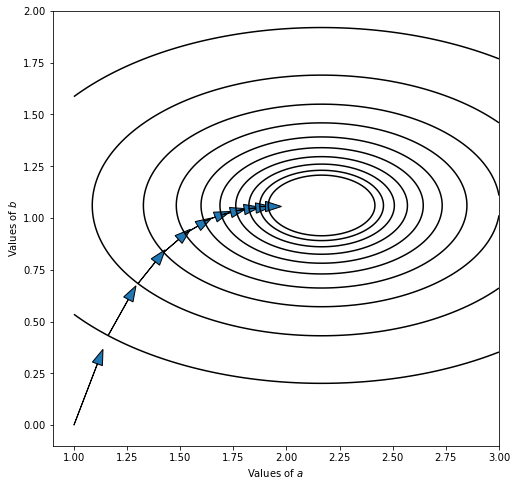

In [45]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

a_ind = 0
b_ind = 0
lr = 0.2
point = (prop_a[a_ind],prop_b[b_ind])
levels = []
for i in range(0,10):
    dLdb,dLda = compute_gradient_at(b_ind,a_ind)
    new_a = point[0] - lr*dLda
    new_b = point[1] - lr*dLdb
    a_ind = np.min(np.argwhere(prop_a > new_a))
    b_ind = np.min(np.argwhere(prop_b > new_b))
    
    plt.arrow(point[0],point[1],-lr*dLda*0.7,-lr*dLdb*0.7,head_width=0.05)
    point = (prop_a[a_ind],prop_b[b_ind])
    
    grad_len = np.sqrt(dLda**2+dLdb**2)
    arrow_len = 0.3
    
    
    levels.append(L[b_ind,a_ind])
ax.contour(a,b,L,levels[::-1],colors='black')
ax.set_xlabel('Values of $a$')
ax.set_ylabel('Values of $b$')
plt.show()

#### Learning rate

The learning rate sets the step length in the gradient descent. The learning rate is a very important parameter to choose for some problems, for instance for neural networks (that we will see later). If we choose a too large learning rate then the gradient descent can overshoot and miss the minima. However, for the purpose of this course you will not really encounter any particular problem with choosing the learning rate, and you can use the standard options in the software packages we will use. When you have gone through the course, please feel free to revisit the concept of learning rate, and read for instance [https://en.wikipedia.org/wiki/Learning_rate](https://en.wikipedia.org/wiki/Learning_rate).

#### Measuring Performance

After training a model (i.e. fitting parameters), we need to figure out how good the model is. In the case of regression, **Mean Square Error** would be an option and it has the same form as the cost function. To measure the performance, we need to measure the squared distance between the *predicted* and *actual* values. According to that, if the actual values are stored in vector $y$ and the predicted values are stored in vector $\hat{y}$, then we define

$$\text{MSE}=\frac{1}{n} \sum_{i=1}^n |y_i - \hat y_i|^2.$$

Later during this course, we will learn more about different metrics that are suitable for different problems.

### Classification
In this subsection we will talk about classification problems where the label $y$ is discrete. When $y$ can only take two possible values in the set $\{0,1\}$, then we can use a nonlinear extension of linear regression called *logistic regression*. When $y$ can take more than $2$ discrete values (but finitely many) then we can use an extension of *logistic regression* known as [*multinomial logistic regression*](https://en.wikipedia.org/wiki/Multinomial_logistic_regression).

#### Multinomial logistic regression
We begin by considering a classical example, the Iris dataset, which contains measurements of various features of flowers belonging to three different species of iris. 
This dataset looks as follows:

In [47]:
iris = pd.read_csv('../../Data/iris.csv')
iris.head(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


Let us clean the dataframe so that it only contains the species, sepal length and width as well as the petal length and width:

In [48]:
iris = iris[iris.columns[1:]]
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


We wish to make this into a classification problem, i.e. we want to predict the species using the [sepal](https://en.wikipedia.org/wiki/Sepal) and petal measurements.

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear',multi_class='auto')

In [50]:
feature_columns = iris.columns[:4]
target_column = iris.columns[-1]
X = iris[feature_columns]
y = iris[target_column]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1235)
log_reg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [52]:
log_reg.score(X_test,y_test)

0.9111111111111111

The above score is the mean accuracy of the classification.

$$\text{accuracy}(y,\hat y) = \frac{1}{N} \sum_{i=1}^N 1_{\hat y_i = y_i}$$

where $1$ is the indicator function, i.e. it takes the value $1$ if $\hat y_i = y_i$ and $0$ otherwise. 
Thus, $\text{accuracy}(y,\hat y)$ measures the amount of correctly classified items averaging over all labels, and is thus a crude summarizing metric. To get a more in-depth view of what is going on we can do a *classification report* as follows.

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_reg.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.76      0.87        17
   virginica       0.75      1.00      0.86        12

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



This is a bit more interesting since we get the *precision* and *recall* for each category. Recall is simply the fraction of items in class $i$ that got correctly classified as being in class $i$, while precision is the fraction of items that the classifier labels as being $i$ that is actually $i$.

In [54]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL('https://en.wikipedia.org/wiki/Precision_and_recall',400)

Let us take *virginica* as an example, here the recall is 1.0 which means that all *virginica* flowers are classified as being *virginica*. While 0.75 in precision means that 75% of all the flowers that are classified as *virginica* are actually *virginica*. Since *setosa* and *virginica* have recall 1.0 it means that the only misclassified ones are some *versicolor* that get wrongly classified as *virginica*. 

#### What is actually going on here and what is the loss?

Consider the following dataset which depicts a subset of men and women together with their heights and shoe sizes.

In [55]:
df = pd.read_csv('../../Data/wo_men.csv').dropna()
df.head(3)

,time,sex,height,shoe_size
0,04.10.2016 17:58:51,woman,160.0,40.0
1,04.10.2016 17:58:59,woman,171.0,39.0
2,04.10.2016 18:00:15,woman,174.0,39.0


Given this dataset, we can plot the distribution of height for the different sexes, as follows.

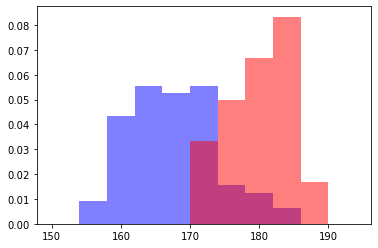

In [56]:
_ = plt.hist(df[df['sex'] == 'woman']['height'],color='blue',alpha=0.5,density=True,bins=range(150,190,4))
_ = plt.hist(df[df['sex'] == 'man']['height'],color='red',alpha=0.5,density=True,bins=range(150,195,4))

Giving each woman and man labels $1$ and $0$, respectively, we get the following plot.

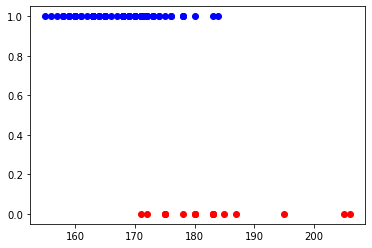

In [57]:
x = np.concatenate([np.linspace(-1,0,10),np.linspace(0,1,10)])
class0 = df[df['sex'] == 'man']['height'].values
class1 = df[df['sex'] == 'woman']['height'].values
plt.scatter(class0,np.zeros_like(class0),color='red')
plt.scatter(class1,np.ones_like(class1),color='blue')

In [58]:
# Our class proportions are the following
len(class1)/(len(class0)+len(class1))

0.8181818181818182

What we want is a model that takes the height $x$ as input and outputs the label $y$ (for the sex), i.e. a function $f(x) = y$. So, from a statistical point of view we want to model:

$$P(y = 1 | x) \quad \text{and} \quad P(y = 0 | x).$$

What is a reasonable class of functions $f$ for which we can fit a parameter to separate these two classes?

Traditionally this has been done with the so called **logistic function**

$$\sigma(z) = \frac{1}{1+\exp(-z)}.$$

So how do we control the shape of this function? We do this by taking the linear regression part from before, i.e.

$$f(x) = Ax + B$$

and then using $\sigma(f(x))$ as our estimator for $P(y = 1| x)$. To be a bit clearer, let us look at the plot of the logistic function next.

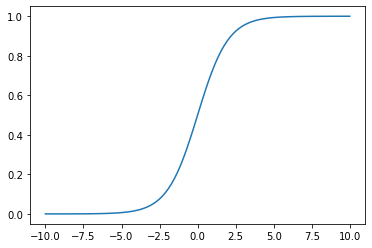

In [59]:
x = np.linspace(-10,10,100)
logistic = lambda x: 1/(1+np.exp(-x))
plt.plot(x,logistic(x))
plt.show()

This allows us to provide a fairly steep switch between the two classes over something which is called a decision boundary (0 in this case).

So now that we have the model, how are we going to find a suitable cost function? In machine learning this is usually done with what is called a maximum likelihood estimate. What this means is simply that we want to compute the likelihood of the observed data given the parameters of the model. To be precise we want to compute, for a set of i.i.d. samples $x_i, y_i$, 

$$\prod_{i=1}^N P(y=y_i | x_i,A,B)$$

which is just the probability of observing this data given the parameters $A,B$. But since we assumed that our model was modeling $P(y=1|x)$ we can just apply it and we get

$$L(A,B)=\prod_{i=1}^N P(y=1 | x)^{y_i} P(y = 0|x)^{1-y_i} = \prod_{i=1}^N \sigma(f(x_i))^{y_i} (1-\sigma(f(x_i)))^{1-y_i} $$

This is now our likelihood of the data given the model. Now, our goal is to find the parameters $A,B$ that maximizes the above statement. However, working with a product and powers is neither mathematically convenient nor numerically robust, so we just apply $\log$, the natural logarithm, to the equation. Maximizing $\log(L(A,B))$ is the same as maximizing the original function $L(A,B)$, i.e., both take the maximum value at the same $A,B$.

$$L_l(A,B) = \log(L(A,B)) = \sum_{i=1}^N y_i \log(\sigma(f(x_i)))+(1-y_i)\log(1-\sigma(f(x_i))) $$

The way we now define our cost function is simply to take $-L_l(A,B)$ and we have a function to minimize.

If we now relabel the 0 class to -1, we can rewrite our cost function as follows (try if you want some exercise):

$$-L_l(A,B) = \sum_{i=1}^N \log(1+\exp(-y_i f(x_i)))$$

Often one introduces a regularization or penalization term to reduce overfitting, it usually looks as follows:

$$-L_l(A,B) = \sum_{i=1}^N \log(1+\exp(-y_i f(x_i))) + \lambda(\|A\|^2 + \|B\|^2)$$

for a given penalty or regularization term $\lambda > 0$ that can be adjusted. Usually $\lambda = 1$ in the default unpenalized case. We think of $\lambda$ as a penalty term because it penalizes large values of the parameters.

Let us have some fun and look at the data with heights of men and women again. We first setup our classes below.

In [60]:
# Let us create our labeled data, mapping our 0 class to -1 simplifies the cost function, so lets do that
x = np.concatenate([class0,class1])
y = np.concatenate([np.zeros_like(class0),np.ones_like(class1)])*2-1

As recommended, what we should do before performing any logistic regression is to pre-scale the feature variables to have mean $0$ and standard deviation $1$. Here, **sklearn** provides a convenience class for this called the `StandardScaler`. The reason for this is the regularization parameter $\lambda$. If the features are large in value, it will penalize the intercept too hard and we will end up with a poor classifier that could essentially classify all data points as belonging to just one class. We will see the regularization term shortly.

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()
x_sc = sc.fit_transform(x.reshape(-1,1))

In the absolute simplest case, we have no intercept to model, i.e., we have forced $B = 0$. Then we can approach the problem using a parameter search as before, as well as plot our cost function.

[-1.63636364]


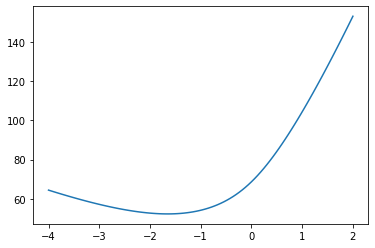

In [63]:
n_steps = 100
prop_a = np.linspace(-4,2,n_steps)
Y = y.reshape(1,len(x_sc))
X = x_sc.reshape(1,len(x_sc))
W = prop_a.reshape(n_steps,1)
WX = W*X

L = np.sum(np.log(1+np.exp(-Y*(WX))),axis=1)
print(W[np.argmin(L)])
plt.plot(W.ravel(),L)

As we did with linear regression we can also plot the 3d curve of the cost function when we minimize over $A$ and $B$ simultaneously.

/var/folders/s7/xkh8xd712s7gmjqzf010dd8c0000gr/T/ipykernel_69891/3527154661.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


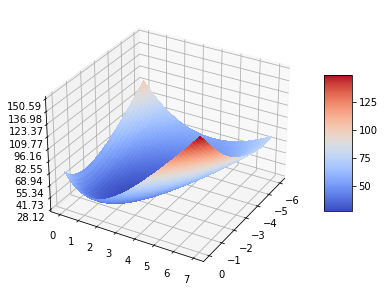

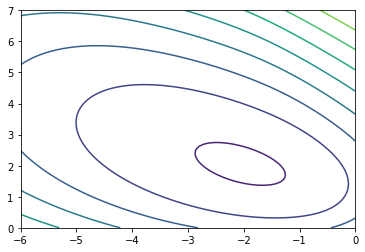

In [64]:
n_steps = 100
prop_a = np.linspace(-6,0,n_steps)
prop_b = np.linspace(0,7,n_steps)

#prop_a.shape
a,b = np.meshgrid(prop_a,prop_b)

Y = y.reshape(1,1,len(x_sc))
W = a.reshape(n_steps,n_steps,1)
X = x_sc.reshape(1,1,len(x_sc))
WX = W*X
B = b.reshape(n_steps,n_steps,1)

L = np.sum(np.log(1+np.exp(-Y*(WX+B))),axis=2) + 0.5*(np.sum(W**2+B**2,axis=2))

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(a, b, L, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(np.min(L), np.max(L))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 30)
plt.show()
plt.contour(a,b,L,10)

In [65]:
#min_pos = np.argmin()
ind_a = np.argmin(np.min(L,axis=0))
ind_b = np.argmin(np.min(L,axis=1))
print("Optimal a: %f, Optimal b: %f" % (prop_a[ind_a], prop_b[ind_b]))

Optimal a: -2.000000, Optimal b: 1.979798


Above we have also inserted what is called an $l^2$ regularization. This is normally used to weight down the values of $A$ and $B$ by penalizing big values. Why? Simply because this tends to reduce what is called overfitting - when our fit essentially adapts too well to the data and thus does not generalize well to new previously unseen data. We will come back to overfitting and regularization a bit later.

### Softmax regression

Consider now, instead of binary classification, i.e. classification between two classes, we have multiple classes we want to distinguish between, say $k$ classes. We cannot use the same type of method as in logistic regression as it only has one output. 

Remember that in the case of logistic regression, we chose to model $P(y = 1| x)$, and not both $P(y=0|x)$ and $P(y=1|x)$. This is simply because one is the complement of the other, i.e., $P(y=1|x) = 1 - P(y = 0|x)$. This idea still holds true if we have $k$ classes, but now we model $k-1$ probabilities and skip the last one, simply because we know that

$$\sum_{i=1}^k P(y = i | x) = 1$$

i.e., knowing $k-1$ values means that we know the last one as well, since they sum to $1$. Now instead of the logistic function we will be using another function called the **softmax** function:

$$P(y = i | x_i) = \frac{\exp(\eta_i)}{\sum_{j=1}^k \exp(\eta_j)}$$

Here, we model $\eta_i$ with a linear term just as in logistic regression 

$$\eta_i = A_i x + B_i.$$

Note that we actually have $k-1$ output functions and $k-1$ matrices $A_i,B_i$. 

As a user of for instance the ``sklearn`` framework will make no syntactic difference when performing softmax regression instead of logistic regression above. In fact, it is called logistic regression in ``sklearn`` and we have already used it when we did the ``iris`` example above.

## Decision Tree

Decision trees have been used a long time as a way to perform both regression and classification while at the same time they have a high degree of explainability, which is important in many cases. The idea is that the model forms a set of conditions and, depending on which ones are satisfied, it leads to a decision. We begin with a simple picture of a decision tree, which looks as follows:

![Basic Decision Tree](Decision_Tree.png)

Let's say it is 2km to the store and the car is not home, the decision tree will tell us to stay home. What these criteria look like and the decision that the tree gives is something that is learned from data, i.e. from a set of choices in different scenarios. The easiest model to picture based on the tree above is that of a classification problem where we can see the classification as a decision.


#### Classification

So how does it actually work? How do you train such a decision tree?

Well, the decision tree is built by starting at the top node then formulating a criterion that tries to find the best possible feature and its value to split on. Each split is a yes/no question, i.e. we want to find a split value, e.g. "is the feature _'distance to store'_ less than 1". This splits all observations into two sets: where it is less than one and where it is greater than or equal to one. One set goes down to the left child node and the other goes down the right child node. At each node there is a split until some stopping criterion ends the splitting. Once this is done we end up with a tree as above.

The algorithm to construct a decision tree is as follows

```python
function build_tree(node, data)
    split_value, best_feature = find_best_feature(data)
    
    if (best_feature == -1)
        # We did not find a feature to split on
        # thus node is a leaf
        node.value = most_common(data[label])
        
    node.split_value = split_value
    node.feature = best_feature
    
    left_data = data[data[best_feature] < split_value]
    right_data = data[data[best_feature] >= split_value]
    
    build_tree(node.left_node,left_data)
    build_tree(node.right_node,right_data)
```

What we see in the algorithm above is that it is recursive; at each node it will split into two separate branches and thus become a binary tree. The `find_best_feature` function will search through the features in the data and find the feature and the split value that maximizes some measurement of differences. For instance, the absolute best case would be a split that separates the labels completely.

How do we measure this difference when there is no perfect split between the labels using the features? For classification there are a few options:

1. [Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)
2. [Cross-Entropy](https://en.wikipedia.org/wiki/Decision_tree_learning#Information_gain)
3. Misclassification, simply the proportion of misclassified items in the node.

If you wish to learn more about splitting criteria please use the links above to Wikipedia as a starting point.

#### Regression

The difference between regression and classification when it comes to decision trees is the following:

1. We use a different splitting criterion, [Mean Square Error](http://scikit-learn.org/stable/modules/tree.html#regression-criteria) and [Mean Absolute Error](http://scikit-learn.org/stable/modules/tree.html#regression-criteria)
2. Instead of taking the most common label, we compute the value of each node as the average of all the data points that end up in that leaf node.

#### Example of decision tree for classification

Here we will again use the Iris dataset, which we split into a training and test set. We first construct a decision tree using the training set, evaluate its performance on the test set and lastly visually inspect the decision tree model.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split

iris = pd.read_csv('../../Data/iris.csv')
iris = iris[iris.columns[1:]]
iris.head(2)

feature_columns = iris.columns[:4]
target_column = iris.columns[-1]
X = iris[feature_columns]
y = iris[target_column]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X,y,test_size=0.3,random_state=1235)

In [52]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(random_state=100)
dct.fit(X_train_c,y_train_c)

DecisionTreeClassifier(random_state=100)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test_c,dct.predict(X_test_c)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.88      0.94        17
   virginica       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



As we can see it performs very well on the test dataset.

Now let us visualize the decision tree.

In [70]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from IPython.display import Image

In [71]:
#This exports the decision tree into a .dot file that can be loaded with graphviz

export_graphviz(decision_tree=dct,out_file='dct.dot',feature_names=feature_columns,impurity=False,rounded=True)

In [72]:
from graphviz import Source

# This code loads the graphviz code from the .dot file and shows it
a = Source.from_file('dct.dot',format='png')
a.view()

'dct.dot.png'

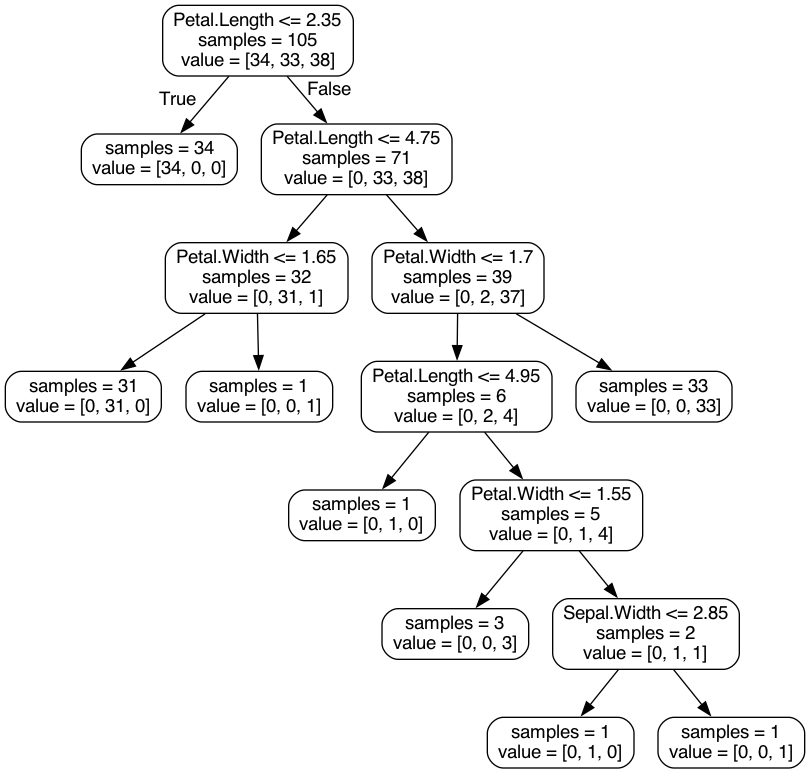

In [73]:
Image('dct.dot.png')

From the top node in the decision tree above we can see that the training set, which originally consists of 105 observations of iris flowers (34 setosa, 33 versicolor and 38 virginica), is split into two groups based on whether the petal length is less than or equal to 2.35 or not. Using this splitting criterion we are actually able to separate out all flowers of the setosa species in the training set with just one split of the data.

When we use this descision tree to make a prediction, we follow the decision tree down to a leaf and predict the class that had the highest count in that leaf during training. If we for example would like to classify an iris flower with petal length 5 and petal width 1.5, we would end up in a leaf that saw 0 setosa, 31 versicolor and 0 virginica during training. Hence it it quite natural to predict that our iris flower also is of the species versicolor.

Note that in the decision tree above each leaf is supported by observations from a single class. This is known as a fully grown decision tree as there is no point in doing any further splits.

#### Example of decision tree for regression

Let's revisit the Cars dataset and use it to construct, visualize and evaluate a decision tree model to predict the fuel consumption of a car in gallons per mile (GPM).

In [74]:
import pandas as pd
cars = pd.read_csv('../../Data/cars.csv')

# Convert Miles per Gallon to Gallons per Mile
cars['GPM'] = 1/cars['MPG']
cars = cars.dropna()

First we inspect the columns of the dataset:

In [75]:
cars.columns

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin', 'GPM'],
      dtype='object')

Here we will use the variables Cylinders, Weight, Year, Origin and Displacement as features. Next we divide the data into a training and test set:

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cars[['Cylinders','Weight','Year','Origin','Displacement']], cars['GPM'], random_state=0)

Now let's use the training set to construct a decision tree. For visualization purposes we will set the maximum depth (i.e. the maximum number of splits before reaching a leaf node) of the decision tree to a low number, namely 3.



In [77]:
from sklearn.tree import DecisionTreeRegressor
dcr = DecisionTreeRegressor(max_depth=3)

In [78]:
dcr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [79]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

# This exports the decision tree into a .dot file that can be loaded with graphviz
export_graphviz(decision_tree=dcr,out_file='dcr.dot',feature_names=['Cylinders','Weight','Year','Origin','Displacement'],impurity=False,rounded=True,label='none',proportion=True)

In [80]:
from graphviz import Source

# This code loads the graphviz code from the .dot file and shows it
a = Source.from_file('dcr.dot',format='png')
a.view()

'dcr.dot.png'

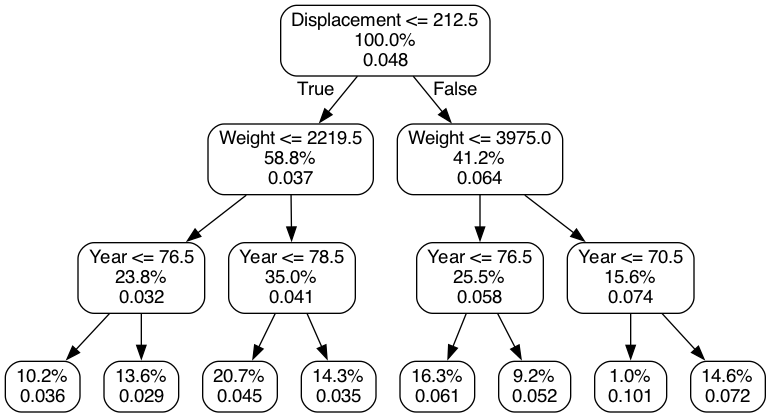

In [81]:
Image("dcr.dot.png")

In the decision tree above, the splitting criterion in the top node is based on the displacement (i.e. engine size); cars having a displacement of 212.5 or less (corresponding to 58.8% of the cars in the training set) are allocated to one branch while cars having a larger displacement (41.2% of cars in the training set) end up in the other branch. The average fuel consumption of all cars in the training set is 0.048 gallons per mile. After the initial split we can see that the average is 0.037 in cars having a smaller displacement and 0.064 in cars having a larger displacement.

Suppose we were tasked with predicting the fuel consumption for a car in the test set having a displacement of 300, a weight of 3,500 and that was produced in 82. According to the decision tree above we would predict its fuel consumption to be 0.052 gallons per mile, which is the average fuel consumption of the cars in the training set that also ended up in this leaf node.

By plotting fuel consumption against displacement we can see that the initial splitting criterion seems to be reasonable - a larger displacement is in general associated with a higher fuel consumption:

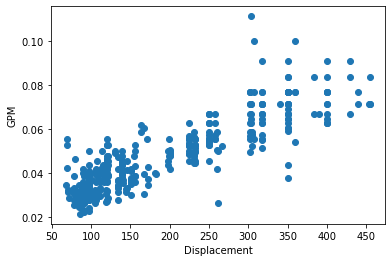

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(cars['Displacement'],cars['GPM'])
plt.xlabel('Displacement')
plt.ylabel('GPM')
plt.show()

Finally we evaluate the performance of the decision tree model using the test set. For the sake of comparison we also display the performance on the training set.

In [83]:
from sklearn.metrics import mean_squared_error
train_predictions = dcr.predict(X_train)
test_predictions = dcr.predict(X_test)

# When using the parameter squared=False, mean_squared_error returns the rmse
train_score = mean_squared_error(y_train, train_predictions, squared=False)
test_score = mean_squared_error(y_test, test_predictions, squared=False)

print("Training score: %f, Test score: %f" % (train_score, test_score))

Training score: 0.006493, Test score: 0.008874


In the module **Measuring model performance**, we will dive deeper into how to interpret these numbers. In the module **Applying Data Science in Practise**, we will talk about why the test score almost always is worse than the training score, how to know when this is a problem, and what to do about it.

***
<center>Combient Mix AB All Rights Reserved</center>

***